<a href="https://colab.research.google.com/github/MajorRedux/PatternFlow/blob/topic-recognition/lab_demo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Demonstration 2
# Pattern Recognition 

## **1 Part 1 - Eigenfaces (5 Marks)**



In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
## Data Aquisition

# Download data (if not already on disk) and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70,resize=0.4)

# Examine image arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
print("Image - Height: %d ; Width: %d" % (h, w))

# use data directly
X = lfw_people.data
n_features = X.shape[1]
print("Data Shape:", X.shape)

Image - Height: 50 ; Width: 37
Data Shape: (1288, 1850)


In [ ]:
## Data Verification

# assigning labels
y = lfw_people.target
print("Data Verification")
print("Labels: ", y)
# check label data
target_names = lfw_people.target_names
print("Label Names:", target_names)
# check class shape
n_classes = target_names.shape[0]
print("Classes:", n_classes)

# data overview
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Data Verification
Labels:  [5 6 3 ... 5 3 5]
Label Names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
Classes: 7
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
## Data Preprocessing
print("Verify Data Shapes")

# Split into training set and test set using stratified k fold
# cross-validation variation of KFold that returns stratified folds (preserving percentages of samples of each class)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Training data: ", X_train.shape)
print("Testing data: ", X_test.shape)
print("Training labels: ", X_train.shape)
print("Testing labels: ", X_test.shape)

# Compute PCA (eigenfaces) on the face dataset (treated as unlabeled dataset) 
# unsupervised feature extraction / dimensionality reduction
n_components = 150

Verify Data Shapes
Training data:  (966, 1850)
Testing data:  (322, 1850)
Training labels:  (966, 1850)
Testing labels:  (322, 1850)


**Numpy Version**

In [ ]:
# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print("Training data shape: ", X_transformed.shape)
X_test_transformed = np.dot( X_test, components.T)
print("Testing data shape: ", X_test_transformed.shape)

Training data shape:  (966, 150)
Testing data shape:  (322, 150)


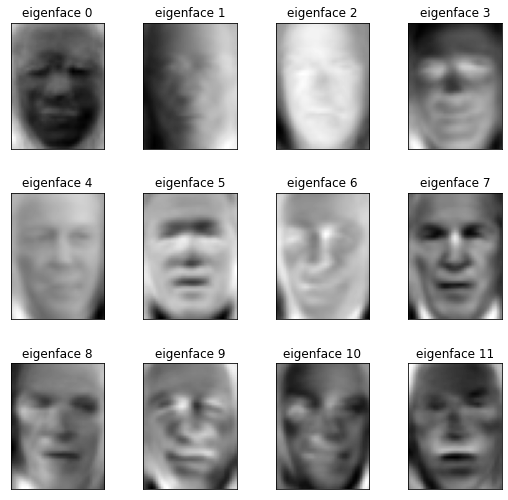

In [ ]:
import matplotlib.pyplot as plt
# Qualitative evaluation of the predictions using matplotlib 2
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  """Helper function to plot a gallery of portraits"""
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

(966,)


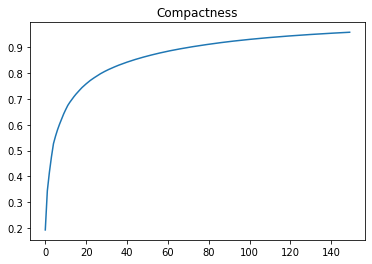

In [ ]:
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]

#print(type(X_test_transformed))
predictions = estimator.predict(X_test_transformed)

#predictions = tf.estimator.Estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
4
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 6 3 3 3 3 6 3 3 4 1 3 3 3 1 3 4 3 3 3 3 0 3 1 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 1 2 1 3 5 3 1 1 3 6 2 4 1 4 1 3 1 6 3 3
 3 3 3 1 1 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3
 3 6 3 3 3 1 4 1 3 1 3 3 1 3 4 4 3 1 3 6 6 6 3 3 6 3 3 1 3 1 3 3 1 3 3 1 3
 3 1 4 1 1 3 3 3 6 3 3 3 6 5 3 1 3 3 5 1 3 3 1 3 3 1 6 3 3 3 3 3 3 3 3 1 3
 3 3 3 3 2 4 3 2 3 6 3 3 3 3 6 3 3 3 2 3 3 4 2 4 3 6 5 3 3 3 4 3 2 3 3 3 3
 3 1 1 3 3 3 1 3 3 3 3 3 3 1 3 6 3 3 3 4 3 3 3 3 3 3 1 4 4 3 3 4 3 4 3 1 3
 3 3 3 3 1 3 6 3 1 3 1 1 3 3 3 6 3 3 3 3 3 1 1 3 3 3 1 3 5 3 4 3 3 5 3 3 1
 3 6 3 3 3 6 3 2 1 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 4 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True  True False  True False
 False False False  True  True  True False False  True False  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  T

**Tensorflow Version**

In [ ]:
# Centre data
# computes mean elements across dimension of tensor
mean = tf.math.reduce_mean(X_train, axis = 0)
X_train -= mean
X_test -= mean

# Eigen-decomposition
# Computes singular value decompositions of matrices
# order of arguments s,u,v when compute_uv = true (as opposed to u,s,v for np.linalg.svd)
S, U, V = tf.linalg.svd(X_train, full_matrices=False, compute_uv=True)
# intermediary step to store the transpose
_V = tf.transpose(V)
# print("V:", _V.shape)
components = _V[:n_components]
#print("components", components.shape)
# eigenfaces = components.reshape((n_components, h, w))
# tf.reshape the tensor goes inside the argument
eigenfaces = tf.reshape(components,(n_components, h, w))
#print("eigenfaces", eigenfaces.shape)

# Project into PCA subspace
# Multiplies matrix a by matrix b, producing a * b.
# matmul and tensordot are the same thing
X_transformed = tf.linalg.matmul(X_train, components, transpose_b=True)
#print(X_transformed)

X_test_transformed = tf.linalg.matmul(X_test, components, transpose_b=True)
#print(X_test_transformed.shape)

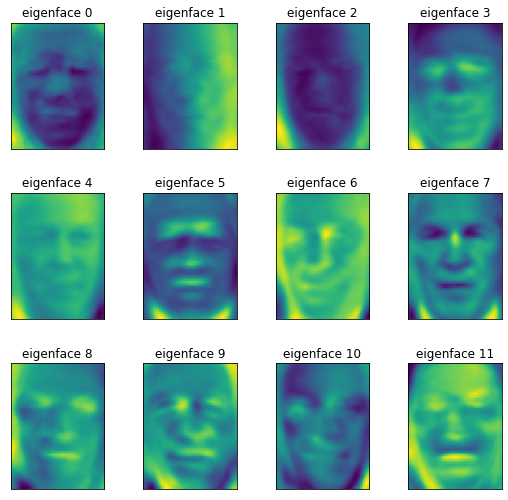

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    # plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
    plt.imshow(tf.reshape(images[i],(h,w)),cmap=plt.cm.viridis)
    plt.title(titles[i],size=12)
    plt.xticks(())
    plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

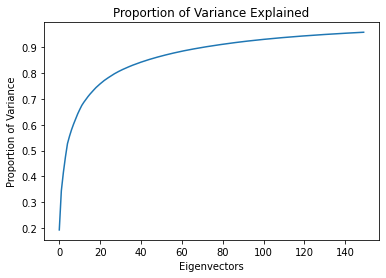

In [ ]:
## Data Analysis
# X: Features
explained_variance = (S ** 2) / (n_samples - 1)
# computes sum of elements across dimensions of a tensor
total_var = tf.math.reduce_sum(explained_variance)
explained_variance_ratio = explained_variance / total_var
# computes cumulative sum of tensor x along axis
ratio_cumsum = tf.math.cumsum(explained_variance_ratio)
#print(ratio_cumsum.shape)
# tf.range creates a sequence of numbers
eigenvalueCount = tf.range(n_components)

plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title("Proportion of Variance Explained")
plt.xlabel("Eigenvectors")
plt.ylabel("Proportion of Variance")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]

#print(type(X_test_transformed))
predictions = estimator.predict(X_test_transformed.numpy())

#predictions = tf.estimator.Estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
4
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)

Total Testing 322
Predictions [3 3 1 3 3 3 3 1 3 3 3 6 3 3 3 3 6 3 3 4 1 1 3 3 1 3 4 3 3 3 1 3 3 3 3 3 3
 3 3 1 3 1 1 1 1 3 3 3 4 3 3 3 3 3 3 2 1 3 4 3 1 1 6 6 3 5 1 4 1 3 1 6 3 3
 3 3 3 1 1 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 2 6 3 3 3 3 3 3 3 3 3 1 3
 1 3 3 3 3 1 4 1 3 1 3 3 1 3 4 4 3 1 3 6 6 6 3 3 6 3 3 1 3 1 3 3 1 3 5 1 3
 4 1 1 1 3 3 3 3 3 3 3 3 6 5 3 1 3 5 5 1 3 3 1 3 3 1 5 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 4 3 2 3 4 3 3 3 3 5 3 3 3 2 5 3 6 2 3 3 1 5 3 3 3 6 3 2 3 3 3 3
 3 1 1 3 3 3 1 3 3 3 3 3 3 1 3 6 3 3 3 4 3 3 3 3 3 3 1 4 4 3 3 4 3 4 3 1 3
 3 3 3 3 1 3 5 3 1 3 1 1 3 3 3 6 3 3 3 3 3 1 1 3 3 3 3 3 3 3 4 3 3 5 3 3 3
 3 3 3 3 3 6 3 2 1 3 3 3 1 3 3 3 1 3 3 3 4 3 3 3 4 3]
Which Correct: [ True  True False  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True  True False  True False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False  True  True False False  True
 False  T

## **2 Part 2 - CNNs (5 Marks)**

In [ ]:
from tensorflow.keras import datasets, layers, models
from sklearn import datasets
from tensorflow import keras

### **1. Dense only layers for classification.**

In [ ]:
## Data Verification
print("Data Verification")
print("Labels:", y)
print("Label Names: ", target_names)
print("Classes: ", n_classes)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Data Verification
Labels: [5 6 3 ... 5 3 5]
Label Names:  ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
Classes:  7
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
# Split into training set and test set using stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

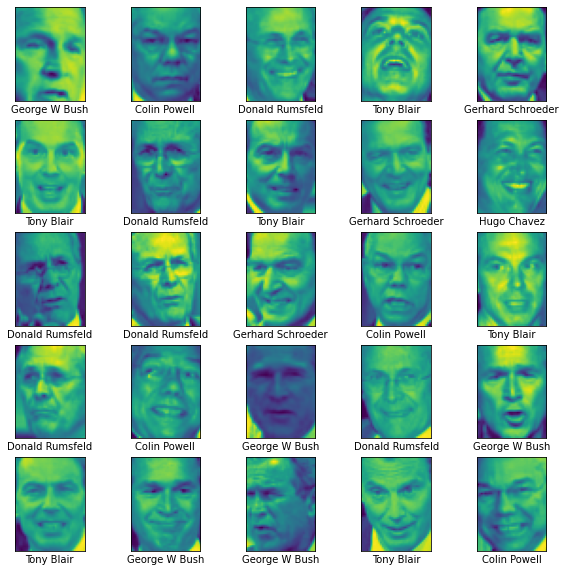

In [ ]:
# Inspect images and verify data
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(tf.reshape(X_train[i], [h, w]),cmap=plt.cm.viridis)
  plt.xlabel(target_names[y_train[i]])
plt.show()

In [ ]:
# reshape and assign training and validation sets
X_train = tf.reshape(X_train, [X_train.shape[0], h, w])
X_test = tf.reshape(X_test, [X_test.shape[0], h, w])

# normalise data (adjust values so they align)
X_train, X_test = X_train / 255.0, X_test / 255

# Add a channels dimension
X_train = X_train[:,:,:, np.newaxis]
X_test = X_test[:,:,:, np.newaxis]
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (966, 50, 37, 1)
Testing data shape: (322, 50, 37, 1)


In [ ]:
# Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.
modelA = keras.Sequential([
                           # flattens the input into one dimension
                           # Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.
                           keras.layers.Flatten(input_shape=(50,37,1)),
                           # basic network where all nodes are connected
                           # These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10.
                           # relu: rectified linear unit (relu) -> biological plausibility, sparse activation, good gradient propogation, efficient computation, scale-invariant                        
                           keras.layers.Dense(128, activation='relu'),
                           # Dropout layer randomly set input units to 0 with frequency rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled by 1/(1 - rate) such that
                           # the sum over all inputs is unchanged.
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(64, activation='relu'),
                           # Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as 
                           # the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
                           keras.layers.Dense(10),
                           
])
modelA.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               236928    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
Total params: 245,834
Trainable params: 245,834
Non-trainable params: 0
_________________________________________________________________


In [ ]:
_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelA.compile(optimizer=_optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
historyA = modelA.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test))

Epoch 1/200
31/31 [==============================] - 0s 6ms/step - loss: 2.1042 - accuracy: 0.3085 - val_loss: 1.6768 - val_accuracy: 0.4534
Epoch 2/200
31/31 [==============================] - 0s 3ms/step - loss: 1.7943 - accuracy: 0.3975 - val_loss: 1.6215 - val_accuracy: 0.4534
Epoch 3/200
31/31 [==============================] - 0s 3ms/step - loss: 1.7155 - accuracy: 0.4017 - val_loss: 1.6006 - val_accuracy: 0.4534
Epoch 4/200
31/31 [==============================] - 0s 3ms/step - loss: 1.6880 - accuracy: 0.4068 - val_loss: 1.5657 - val_accuracy: 0.4534
Epoch 5/200
31/31 [==============================] - 0s 3ms/step - loss: 1.6942 - accuracy: 0.4058 - val_loss: 1.5566 - val_accuracy: 0.4596
Epoch 6/200
31/31 [==============================] - 0s 3ms/step - loss: 1.6396 - accuracy: 0.4369 - val_loss: 1.5396 - val_accuracy: 0.4783
Epoch 7/200
31/31 [==============================] - 0s 3ms/step - loss: 1.6481 - accuracy: 0.4234 - val_loss: 1.4931 - val_accuracy: 0.4689
Epoch 8/200
3

11/11 - 0s - loss: 0.6054 - accuracy: 0.8292
Testing data accuracy: 0.8291925191879272


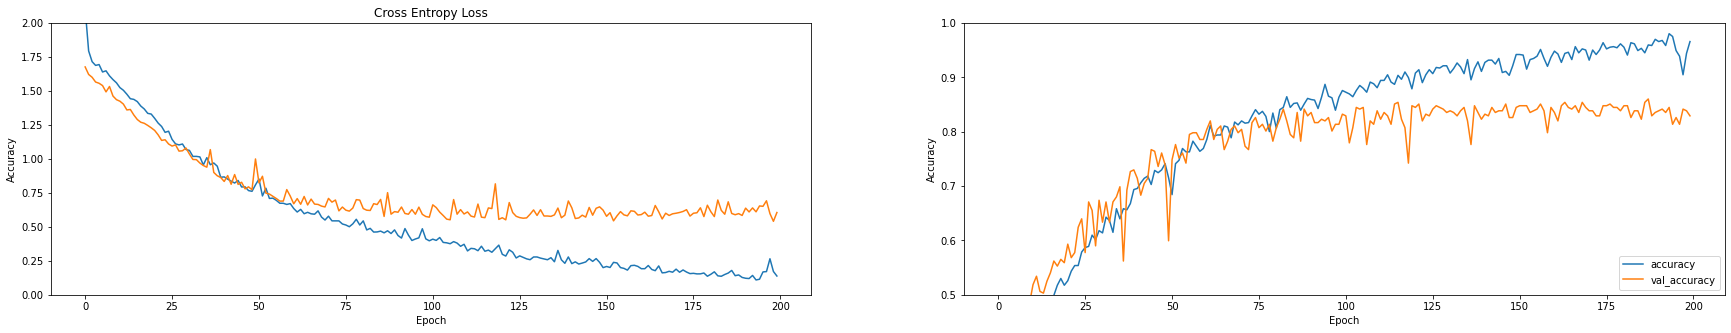

In [ ]:
plt.figure(figsize=(30,5))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(historyA.history['loss'],label='loss')
plt.plot(historyA.history['val_loss'], label = 'val_loss')
# plot details
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
# plot accuracy
plt.subplot(122)
plt.plot(historyA.history['accuracy'],label='accuracy')
plt.plot(historyA.history['val_accuracy'], label = 'val_accuracy')
# plot details
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelA.evaluate(X_test, y_test, verbose=2)
print("Testing data accuracy:", test_acc)

### **2. Two convolution layers of 3x3 with 32 filters each and dense layers for classification.**

In [ ]:
modelB = models.Sequential([
                            keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50,37,1)),
                            keras.layers.Dropout(0.2),
                            keras.layers.Conv2D(32, (3, 3), activation='relu'),
                            #keras.layers.BatchNormalization(),
                            keras.layers.Flatten(),
                            keras.layers.Dense(128, activation='relu'),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(64, activation='relu'),
                            keras.layers.Dense(10),
])
modelB.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 35, 32)        320       
_________________________________________________________________
dropout_18 (Dropout)         (None, 48, 35, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 33, 32)        9248      
_________________________________________________________________
flatten_8 (Flatten)          (None, 48576)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               6217856   
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)               

In [ ]:
_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelB.compile(optimizer=_optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

historyB = modelB.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
31/31 [==============================] - 0s 12ms/step - loss: 2.0158 - accuracy: 0.3851 - val_loss: 1.7683 - val_accuracy: 0.4534
Epoch 2/100
31/31 [==============================] - 0s 7ms/step - loss: 1.7838 - accuracy: 0.3934 - val_loss: 1.6061 - val_accuracy: 0.4534
Epoch 3/100
31/31 [==============================] - 0s 7ms/step - loss: 1.7461 - accuracy: 0.3934 - val_loss: 1.6399 - val_accuracy: 0.4534
Epoch 4/100
31/31 [==============================] - 0s 6ms/step - loss: 1.7393 - accuracy: 0.3996 - val_loss: 1.6045 - val_accuracy: 0.4534
Epoch 5/100
31/31 [==============================] - 0s 7ms/step - loss: 1.7275 - accuracy: 0.3975 - val_loss: 1.6048 - val_accuracy: 0.4534
Epoch 6/100
31/31 [==============================] - 0s 6ms/step - loss: 1.7017 - accuracy: 0.3975 - val_loss: 1.5774 - val_accuracy: 0.4534
Epoch 7/100
31/31 [==============================] - 0s 6ms/step - loss: 1.6850 - accuracy: 0.4068 - val_loss: 1.5881 - val_accuracy: 0.4534
Epoch 8/100


11/11 - 0s - loss: 1.1726 - accuracy: 0.7795
0.7795031070709229


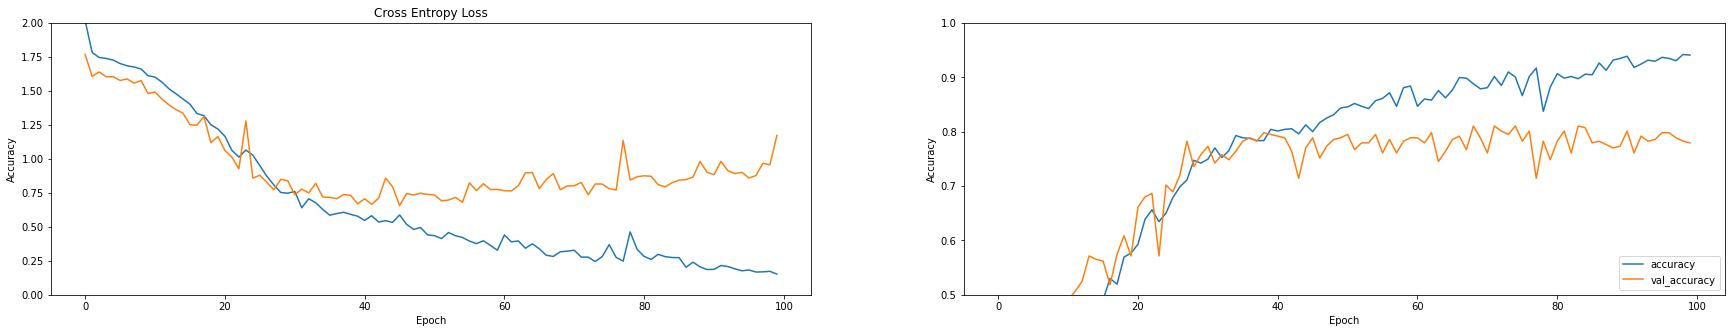

In [ ]:
plt.figure(figsize=(30,5))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(historyB.history['loss'],label='loss')
plt.plot(historyB.history['val_loss'], label = 'val_loss')
# plot details
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
# plot accuracy
plt.subplot(122)
plt.plot(historyB.history['accuracy'],label='accuracy')
plt.plot(historyB.history['val_accuracy'], label = 'val_accuracy')
# plot details
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelB.evaluate(X_test, y_test, verbose=2)
print(test_acc)

### **3. Implement the classification of the CIFAR10 dataset using TF or Keras**

In [ ]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras

print("Training Data Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Data Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

# normalise
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step
Training Data Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Test Data Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)


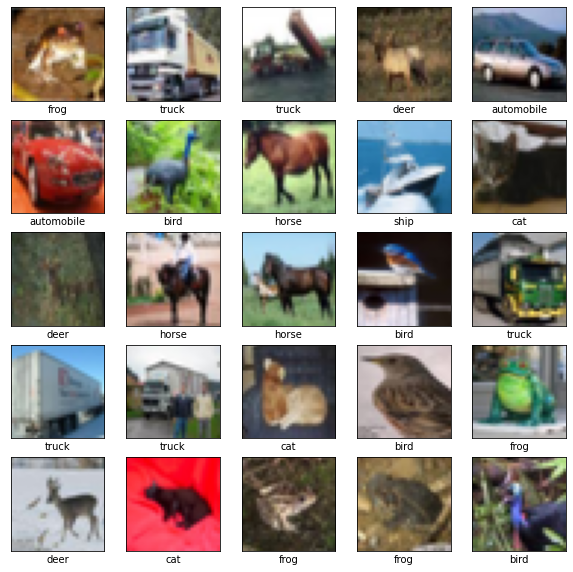

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # CIFAR labels are arrays, which requires additional index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
modelCBaseline = models.Sequential([
                            # Convolutional Layers
                            keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
                            keras.layers.MaxPooling2D((2,2)),
                            keras.layers.Conv2D(64, (3, 3), activation='relu'),
                            keras.layers.MaxPooling2D((2,2)),
                            keras.layers.Conv2D(64, (3, 3), activation='relu'),
                            
                            
                            # Flatten
                            keras.layers.Flatten(),
                            
                            # Dense Layers
                            keras.layers.Dense(64, activation='relu'),
                            keras.layers.Dense(10),
                            

])
modelCBaseline.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)               

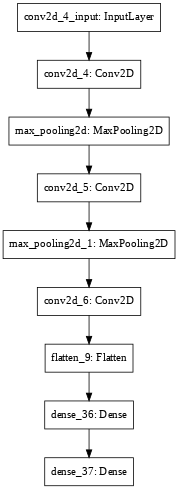

In [ ]:
# Plot model
#tf.keras.utils.plot_model(
#    model, to_file='model.png', show_shapes=False, show_layer_names=True,
#    rankdir='TB', expand_nested=False, dpi=96
#)
tf.keras.utils.plot_model(
    modelCBaseline, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=56
)

In [ ]:
#opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
modelCBaseline.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
historyCBaseline = modelCBaseline.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5473 - accuracy: 0.4337 - val_loss: 1.2956 - val_accuracy: 0.5297
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1791 - accuracy: 0.5796 - val_loss: 1.0586 - val_accuracy: 0.6264
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0142 - accuracy: 0.6432 - val_loss: 1.0393 - val_accuracy: 0.6343
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9185 - accuracy: 0.6785 - val_loss: 0.9359 - val_accuracy: 0.6710
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8418 - accuracy: 0.7056 - val_loss: 0.9157 - val_accuracy: 0.6815
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7809 - accuracy: 0.7270 - val_loss: 0.8994 - val_accuracy: 0.6892
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7276 - accuracy: 0.7472 - val_loss: 0.9362 - val_accuracy:

313/313 - 1s - loss: 0.8688 - accuracy: 0.7104
0.7103999853134155


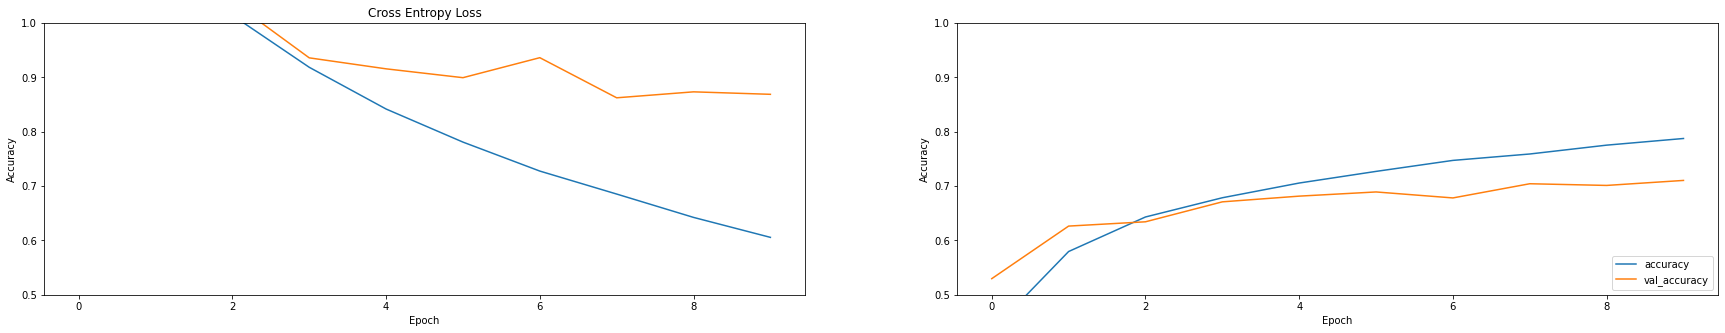

In [ ]:
plt.figure(figsize=(30,5))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(historyCBaseline.history['loss'],label='loss')
plt.plot(historyCBaseline.history['val_loss'], label = 'val_loss')
# plot details
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
# plot accuracy
plt.subplot(122)
plt.plot(historyCBaseline.history['accuracy'],label='accuracy')
plt.plot(historyCBaseline.history['val_accuracy'], label = 'val_accuracy')
# plot details
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelCBaseline.evaluate(test_images, test_labels, verbose=2)
print(test_acc)


In [ ]:
# variables
# Dropout - 2 0.7894
# Dropout - 1 0.7848
# Dropout - 3 0.7785
# Dropout - halving ascending, 0.7357
# Dropout - halving descending 0.7035

#_kernal_initial = ''
_kernal_initial = 'he_uniform' # 0.7894
#_kernal_initial = 'random_normal' #0.7461
#_kernal_initial = 'random_uniform' # 0.59 bad
#_kernal_initial = 'truncated_normal' - 0.60
#_kernal_initial = 'zeros' # 1
#_kernal_initial = 'ones' - 1
#_kernal_initial = 'glorot_normal' - 0.63
#_kernal_initial = 'glorot_uniform' # 0.69 bad
#_kernal_initial = 'orthogonal' - 0.64
#_kernal_initial = 'constant' - 1
#_kernal_initial = 'variance_scaling'
#_activation = 'sigmoid' - 1
#_activation = 'softmax' - 1
#_activation = 'softplus' - 1
#_activation = 'tanh' #0.75
_activation = 'selu'  #1
#_activation = 'elu' - 7.2
#_activation = 'exponential' - 1
#_activation = 'relu'
#_activation_2 = 'sigmoid' - 7.4
#_activation_2 = 'softmax' # 0.75
#_activation_2 = 'softplus' - 7.5
#_activation_2 = 'tanh'- 7.51
#_activation_2 = 'selu' - 7.46
#_activation_2 = 'elu' - 7.45
#_activation_2 = 'exponential' - 7.24
#_activation_2 = 'relu' - 1
modelC = models.Sequential([
                            # Convolutional Layers
                            keras.layers.Conv2D(32, (3, 3), activation=_activation, kernel_initializer=_kernal_initial, padding='same', input_shape=(32,32,3)),
                            keras.layers.Conv2D(32, (3, 3), activation=_activation, kernel_initializer=_kernal_initial , padding='same'),
                            keras.layers.MaxPooling2D((2,2)),
                            keras.layers.Dropout(0.2),
                            keras.layers.Conv2D(64, (3, 3), activation=_activation, kernel_initializer=_kernal_initial, padding='same'),
                            keras.layers.Conv2D(64, (3, 3), activation=_activation, kernel_initializer=_kernal_initial, padding='same'),
                            keras.layers.MaxPooling2D((2,2)),
                            keras.layers.Dropout(0.2),
                            keras.layers.Conv2D(128, (3, 3), activation=_activation, kernel_initializer=_kernal_initial, padding='same'),
                            keras.layers.Conv2D(128, (3, 3), activation=_activation, kernel_initializer=_kernal_initial, padding='same'),
                            keras.layers.MaxPooling2D((2,2)),
                            keras.layers.Dropout(0.2),
                            #keras.layers.MaxPooling2D((2,2)),
                            #keras.layers.Conv2D(128, (3, 3), strides=2, activation=_activation, kernel_initializer=_kernal_initial),
                            #keras.layers.Conv2D(128, (3, 3), strides=2, activation=_activation, kernel_initializer=_kernal_initial),
                            #keras.layers.Dropout(0.03),

                            # Flatten
                            keras.layers.Flatten(),
                            
                            # Dense Layers
                            #keras.layers.BatchNormalization(),
                            #keras.layers.Dense(256, activation=_activation, kernel_initializer=_kernal_initial),
                            #keras.layers.Dropout(0.12),
                            keras.layers.Dense(128, activation=_activation, kernel_initializer=_kernal_initial),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(64, activation=_activation, kernel_initializer=_kernal_initial),
                            #keras.layers.Dropout(0.06),
                            #keras.layers.Dense(32, activation=_activation, kernel_initializer=_kernal_initial),
                            keras.layers.Dense(10, activation='softmax'),

])
modelC.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)        

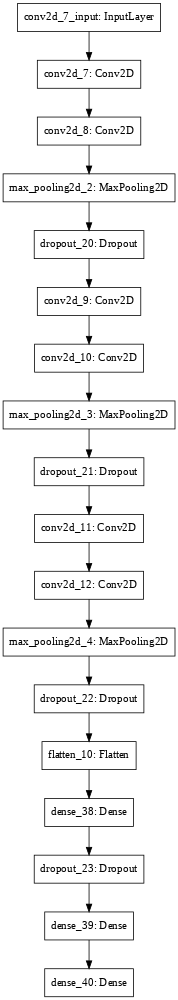

In [ ]:
# Plot Model
tf.keras.utils.plot_model(
    modelC, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=56
)

In [ ]:
#_optimizer = 'SGD' # 0.58
#_optimizer = 'RMSprop' # 0.64
#_optimizer = 'adam' # 0.60
#_optimizer = 'adadelta' - 0.637
#_optimizer = 'adagrad' # 0.66
#_optimizer = 'adamax'
_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
#_optimizer = tf.keras.optimizers.Adamax(
#    learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adamax'
#)
#_optimizer = 'Nadam' - 0.62
#_optimizer = 'Ftrl' - 1
modelC.compile(optimizer=_optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
historyC = modelC.fit(train_images, train_labels, epochs=100, validation_data=(test_images,test_labels))

Epoch 1/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2454 - accuracy: 0.2078 - val_loss: 2.1660 - val_accuracy: 0.2850
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1559 - accuracy: 0.2981 - val_loss: 2.1223 - val_accuracy: 0.3338
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1238 - accuracy: 0.3305 - val_loss: 2.0695 - val_accuracy: 0.3850
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0763 - accuracy: 0.3789 - val_loss: 2.0454 - val_accuracy: 0.4090
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0472 - accuracy: 0.4093 - val_loss: 2.0125 - val_accuracy: 0.4434
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0291 - accuracy: 0.4278 - val_loss: 2.0054 - val_accuracy: 0.4500
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0088 - accuracy: 0.4480 - val_loss: 1.9918 - val_ac

313/313 - 1s - loss: 1.6639 - accuracy: 0.7964
0.7964000105857849


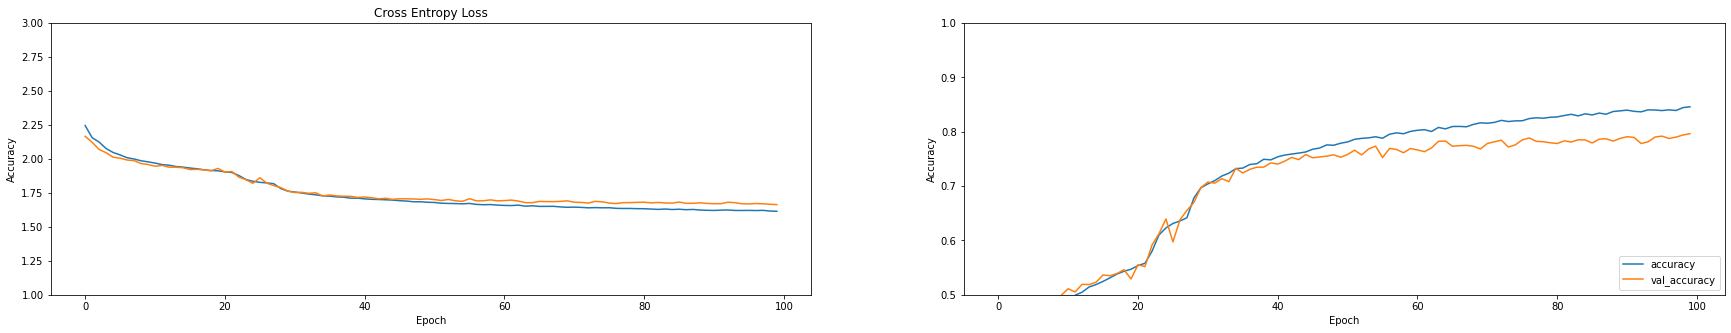

In [ ]:
plt.figure(figsize=(30,5))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(historyC.history['loss'],label='loss')
plt.plot(historyC.history['val_loss'], label = 'val_loss')
# plot details
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([1, 3])
# plot accuracy
plt.subplot(122)
plt.plot(historyC.history['accuracy'],label='accuracy')
plt.plot(historyC.history['val_accuracy'], label = 'val_accuracy')
# plot details
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelC.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

# **3 Part 3 - Recognition (10 Marks)**

In [ ]:
import os, time 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tqdm.auto import tqdm
from tensorflow.keras.utils import Progbar
import time
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
# Play an audio beep. Any audio URL will do.
from google.colab import output
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Connect to GDrive to acquire dta
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Acquire GDrive folder
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/data/img_align_celeba_2000
!pwd
output = "/content/gdrive/My\ Drive/Colab\ Notebooks/data/img_align_celeba_2000"

/content/gdrive/My Drive/Colab Notebooks/data/img_align_celeba_2000
/content/gdrive/My Drive/Colab Notebooks/data/img_align_celeba_2000


In [ ]:
## Aquire Data
# data directory
dir_data      = "/content/gdrive/My Drive/Colab Notebooks/data/img_align_celeba_2000"
# training set amount
Ntrain        = 2000
# testing set amount
Ntest         = 100
nm_imgs       = np.sort(os.listdir(dir_data))
print("Data Director:", dir_data)
print("Images:", len(nm_imgs))
# name of the jpg files for training set
nm_imgs_train = nm_imgs[:Ntrain]
# name of the jpg files for the testing data
nm_imgs_test  = nm_imgs[Ntrain:Ntrain + Ntest]
# output image shape
img_shape     = (64, 64, 3)

# Parse through image folder to get images
def get_npdata(nm_imgs_train):
    X_train = []
    for i, myid in tqdm(enumerate(nm_imgs_train)):
        image = load_img(dir_data + "/" + myid, target_size=img_shape[:2])
        image = img_to_array(image)/255.0
        X_train.append(image)
    X_train = np.array(X_train)
    return(X_train)

# Training Set
X_train = get_npdata(nm_imgs_train)
print("X_train.shape = {}".format(X_train.shape))

# Testing Set
X_test  = get_npdata(nm_imgs_test)
print("X_test.shape = {}".format(X_test.shape))

Data Director: /content/gdrive/My Drive/Colab Notebooks/data/img_align_celeba_2000
Images: 2001



X_train.shape = (2000, 64, 64, 3)


IsADirectoryError: ignored

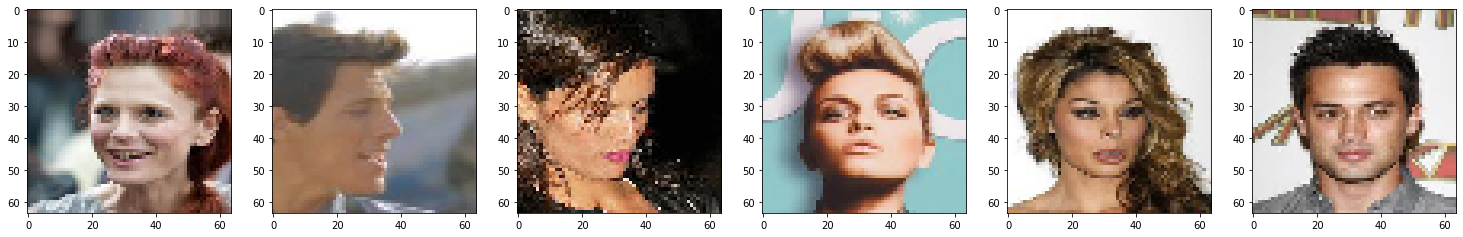

In [ ]:
## Check data and plot resized input images
fig = plt.figure(figsize=(30,10))
nplot = 7
for count in range(1,nplot):
    ax = fig.add_subplot(1, nplot,count)
    ax.imshow(X_train[count])
plt.show()

In [ ]:
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import Nadam

## optimizer
#optimizer = Adam(0.0002, 0.5)
#optimizer = Adam(0.00007, 0.5)
#_optimizer = SGD(0.00001, 0.9)
_optimizer = Nadam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
_kernel_initializer = 'he_uniform'
#_kernel_initializer = 'glorot_uniform'
_activation = 'selu'
#_activation = 'relu'

# Why SeLU?
# Scaled exponential linear units. Problem with backpropagation is gradients can get too small -> vanishing gradients -> weights don't adjust -> learning stops. ReLU can get trapped in a dead state -> weight change too high
# result in z so small that activation function is stuck -> affected cell cannot contribute to learning of the network. Dying ReLUs.
# Normalization can happen in three places -> input normalization (scaling values 0-255) -> batch normalization (transoform values between layers) -> internal normalization (SeLU magic: each layer preserves mean and 
# variance of previous layer)
# SeLU needs both positive and negative values to shift the mean leading to self-normalization. 
## Self-normalization -> no vanishing gradients
## SeLU can't die
## SeLU's learn faster and more efficiently

# Why Nadam?
# Adam -> RMSprop and momentum. Nadam (Nesterov-accelerated adaptive moment estimation) combines adam and nesterov accelerated gradient (NAG). 
# Momentum takes step in direction of previous momentum vector and step in direction of current gradient. NAG allows more accurate step in gradient direction by updating parameters with momentum step BEFORE computing gradient.
# Thus, only need to modify gradient to reach NAG.
# Dozat proposed modifying NAG such that applying look ahead momentum vector directly to update current parameters. Thus, to add Nesterov momentum to Adam, replace previous momentum vector with current momementum vector.

# Why HE_Uniform
# Draws samples from uniform distribution within -limit and limit, where limit is sqrt(6/fan_in), where fan_in is number of input units in weight tensor.
# Similar to glorot_uniform (Xavier initialization) with 2x factor. 
# Weight initialised keeping in mind size of previous layer, attaiting global minimum cost of function faster and more efficiently . Weights are random, but differe in range depending on size of previous layer of neurons.
# Provides controlled initialisation, hence faster and more efficient gradient descent. 


# Generator generates new data instances that are similar to training data. Generator takes random latent vector and ouputs fake image of the same size as reshaped celebA image
def build_generator(img_shape, noise_shape = (100,)):
    '''
    noise_shape : the dimension of the input vector for the generator
    img_shape   : the dimension of the output
    '''
    # noise_shape : the dimension of the input vector for the generator
    # img_shape   : the dimension of the output

    ## latent variable as input
    input_noise = layers.Input(shape=noise_shape) 
    d = layers.Dense(256, activation=_activation, kernel_initializer=_kernel_initializer)(input_noise)
    #d = layers.Dropout(0.2) 
    #d = layers.Dense(256, activation=_activation, kernel_initializer=_kernel_initializer)(input_noise) 
    d = layers.Dense(128*8*8, activation=_activation)(d)
    d = layers.Reshape((8,8,128))(d)
    
    d = layers.Conv2DTranspose(128, kernel_size=(2,2) ,  strides=(2,2) , use_bias=False)(d)
    d = layers.Conv2D( 16  , ( 1 , 1 ) , activation=_activation, kernel_initializer=_kernel_initializer , padding='same', name="block_4_1")(d) ## 16,16
    d = layers.Conv2D( 16  , ( 1 , 1 ) , activation=_activation, kernel_initializer=_kernel_initializer , padding='same', name="block_4_2")(d) ## 16,16
    #d = layers.Conv2D( 32  , ( 1 , 1 ) , activation=_activation, kernel_initializer=_kernel_initializer , padding='same', name="block_4_3")(d) ## 16,16
    #d = layers.MaxPooling2D((1,1))(d)
    d = layers.Dropout(0.2)(d)

    d = layers.Conv2DTranspose(64, kernel_size=(2,2) ,  strides=(2,2) , use_bias=False)(d)
    d = layers.Conv2D( 32  , ( 1 , 1 ) , activation=_activation, kernel_initializer=_kernel_initializer , padding='same', name="block_5_1")(d) ## 32,32
    d = layers.Conv2D( 32  , ( 1 , 1 ) , activation=_activation, kernel_initializer=_kernel_initializer , padding='same', name="block_5_2")(d) ## 32,32
    #d = layers.Conv2D( 64  , ( 1 , 1 ) , activation=_activation, kernel_initializer=_kernel_initializer , padding='same', name="block_5_3")(d) ## 32,32
    #d = layers.MaxPooling2D((1,1))(d)
    d = layers.Dropout(0.2)(d)

    if img_shape[0] == 64:
        d = layers.Conv2DTranspose(64, kernel_size=(2,2) ,  strides=(2,2) , use_bias=False)(d)
        d = layers.Conv2D( 64  , ( 1 , 1 ) , activation=_activation, kernel_initializer=_kernel_initializer , padding='same', name="block_8_1")(d) ## 64,64
        d = layers.Conv2D( 64  , ( 1 , 1 ) , activation=_activation, kernel_initializer=_kernel_initializer , padding='same', name="block_8_2")(d) ## 64,64
        #d = layers.Conv2D( 64  , ( 1 , 1 ) , activation=_activation, kernel_initializer=_kernel_initializer , padding='same', name="block_8_3")(d) ## 64,64
    
    img = layers.Conv2D( 3 , ( 1 , 1 ) , activation='sigmoid' , padding='same', name="final_block")(d) ## 32, 32
    model = models.Model(input_noise, img)
    model.summary() 
    return(model)

## Set the dimension of latent variables to be 100
noise_shape = (100,)

generator = build_generator(img_shape, noise_shape = noise_shape)

generator.compile(loss='binary_crossentropy', optimizer=_optimizer)

Model: "functional_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
dense_149 (Dense)            (None, 256)               25856     
_________________________________________________________________
dense_150 (Dense)            (None, 8192)              2105344   
_________________________________________________________________
reshape_35 (Reshape)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_68 (Conv2DT (None, 16, 16, 128)       65536     
_________________________________________________________________
block_4_1 (Conv2D)           (None, 16, 16, 16)        2064      
_________________________________________________________________
block_4_2 (Conv2D)           (None, 16, 16, 16)     

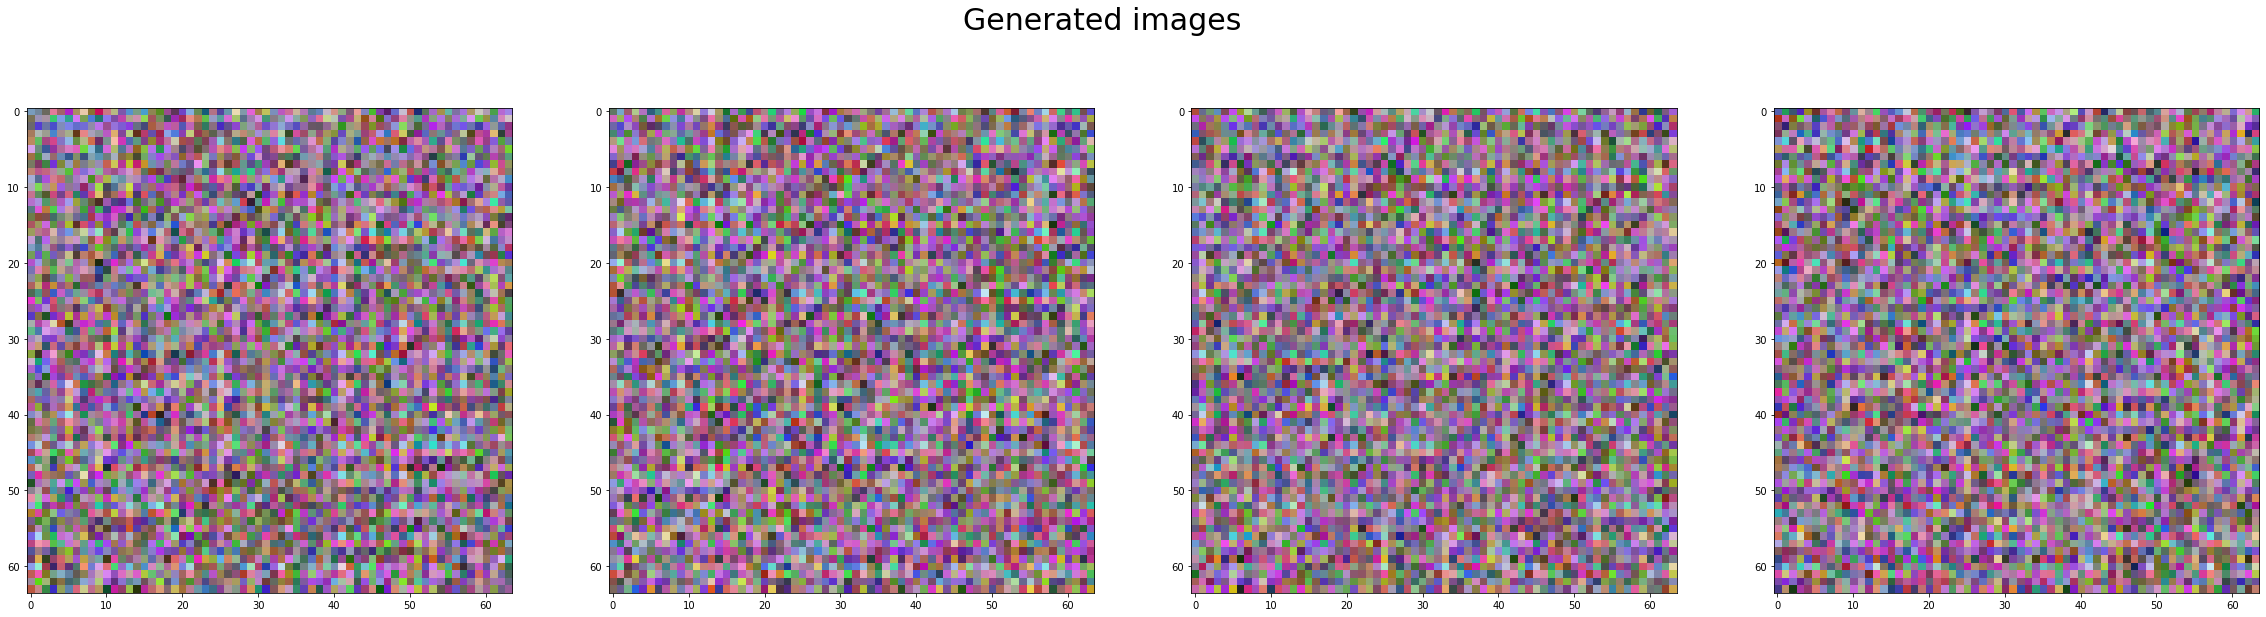

In [ ]:
# Generate noise
def get_noise(nsample=1, nlatent_dim=100):
    noise = np.random.normal(0, 1, (nsample,nlatent_dim))
    return(noise)

# Plot generated images
def plot_generated_images(noise,path_save=None,titleadd=""):
    imgs = generator.predict(noise)
    fig = plt.figure(figsize=(40,10))
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(1,nsample,i+1)
        ax.imshow(img)
    fig.suptitle("Generated images "+titleadd,fontsize=30)
    
    if path_save is not None:
        plt.savefig(path_save,
                    bbox_inches='tight',
                    pad_inches=0)
        plt.close()
    else:
        plt.show()

nsample = 4
noise = get_noise(nsample=nsample, nlatent_dim=noise_shape[0])
plot_generated_images(noise)

In [ ]:
# Discriminator evaluates authenticity of provided images and classifies the images from the generator and the original image. Discriminator takes true or fake images and ouputs probability estimate ranging between 0 and 1.
def build_discriminator(img_shape,noutput=1):
    input_img = layers.Input(shape=img_shape)
    
    # Discriminate shapes
    x = layers.Conv2D(16, (3, 3), activation=_activation, padding='same', kernel_initializer=_kernel_initializer, name='block1_conv1')(input_img)
    x = layers.Conv2D(16, (3, 3), activation=_activation, padding='same', kernel_initializer=_kernel_initializer, name='block1_conv2')(x)
    #x = layers.Conv2D(32, (3, 3), activation=_activation, padding='same', kernel_initializer=_kernel_initializer, name='block1_conv3')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    x = layers.Dropout(0.2)(x) 
    
    # Discriminate edges
    x = layers.Conv2D(32, (3, 3), activation=_activation, padding='same', kernel_initializer=_kernel_initializer, name='block2_conv1')(x)
    x = layers.Conv2D(32, (3, 3), activation=_activation, padding='same', kernel_initializer=_kernel_initializer, name='block2_conv2')(x)
    #x = layers.Conv2D(64, (3, 3), activation=_activation, padding='same', kernel_initializer=_kernel_initializer, name='block2_conv3')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
    x = layers.Dropout(0.2)(x) 
    
    # Discriminate objects
    x = layers.Conv2D(64, (3, 3), activation=_activation, padding='same', kernel_initializer=_kernel_initializer, name='block4_conv1')(x)
    x = layers.Conv2D(64, (3, 3), activation=_activation, padding='same', kernel_initializer=_kernel_initializer, name='block4_conv2')(x)
    #x = layers.Conv2D(128, (3, 3), activation=_activation, padding='same', kernel_initializer=_kernel_initializer, name='block4_conv3')(x)
    x = layers.MaxPooling2D((2, 2), strides=(1, 1), name='block3_pool')(x)
    x = layers.Dropout(0.2)(x) 

    
    x         = layers.Flatten()(x)
    x         = layers.Dense(256, activation=_activation)(x)
    #x         = layers.Dropout(0.2)(x)
    #x         = layers.Dense(256, activation=_activation)(x)
    out       = layers.Dense(noutput,   activation='sigmoid')(x)
    model     = models.Model(input_img, out)
    
    return model

discriminator  = build_discriminator(img_shape)
discriminator.compile(loss      = 'binary_crossentropy', 
                      optimizer = _optimizer,
                      metrics   = ['accuracy'])

discriminator.summary()

Model: "functional_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 16)        448       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 16)        2320      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 32)        4640      
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 32)     

In [ ]:
# Combined model
# Shares same weight as discriminator and generator

z = layers.Input(shape=noise_shape)
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The valid takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity 
combined = models.Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=_optimizer)
combined.summary()

Model: "functional_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
functional_119 (Functional)  (None, 64, 64, 3)         2223011   
_________________________________________________________________
functional_121 (Functional)  (None, 1)                 3758993   
Total params: 5,982,004
Trainable params: 2,223,011
Non-trainable params: 3,758,993
_________________________________________________________________


Epoch 00000 [D loss: 77.242, acc.: 019.5%] [G loss: 0.000]


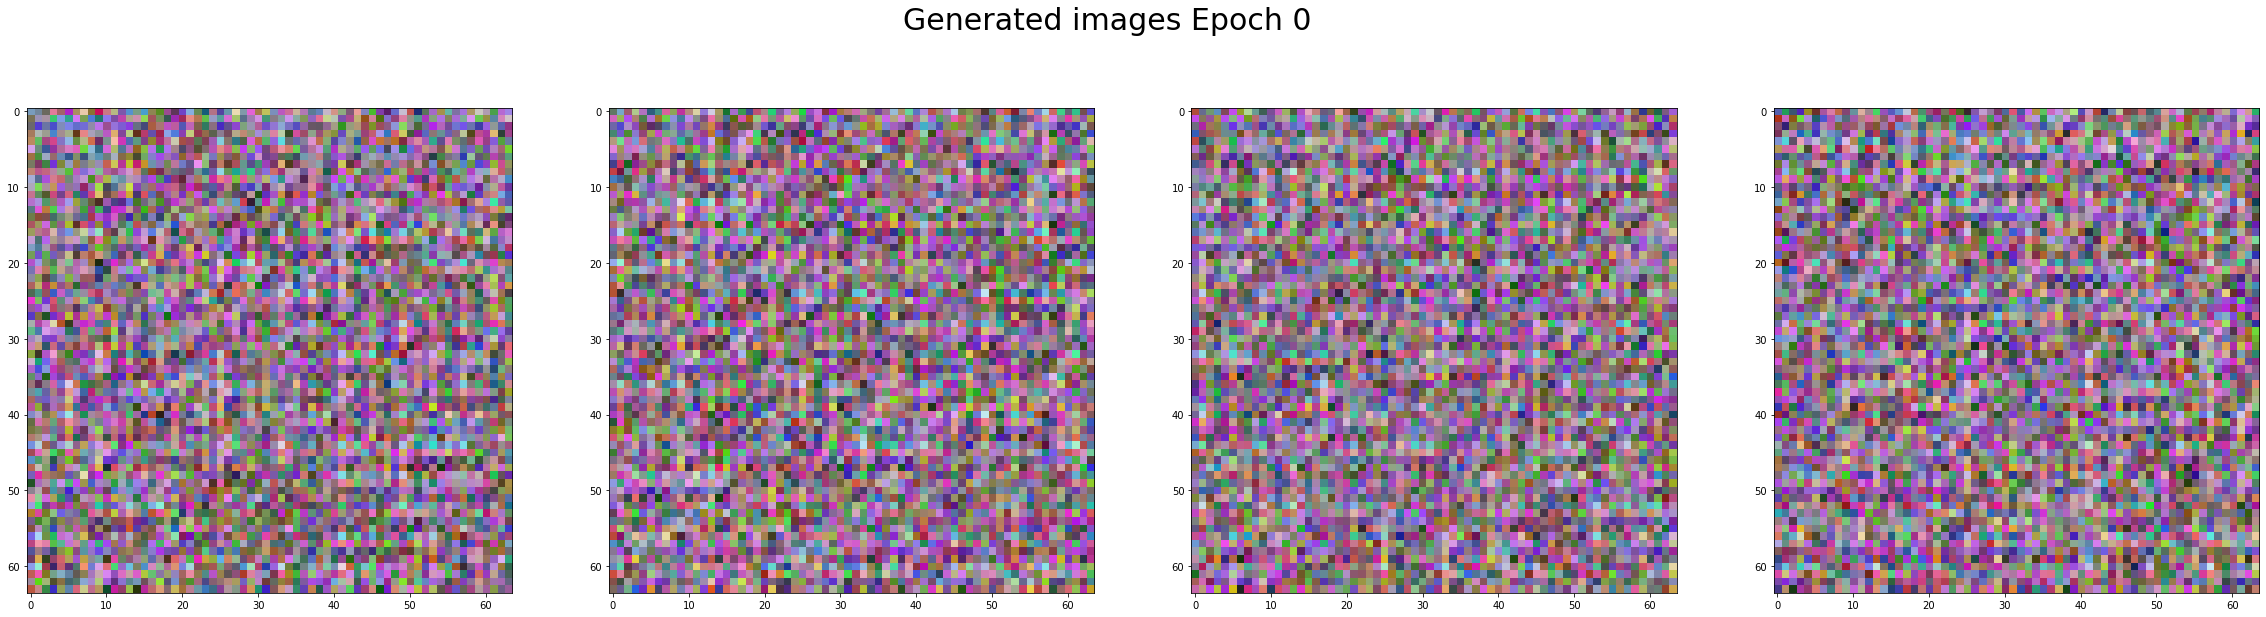

Epoch 00100 [D loss: 0.674, acc.: 065.1%] [G loss: 1.898]
Epoch 00200 [D loss: 0.998, acc.: 047.3%] [G loss: 1.480]
Epoch 00300 [D loss: 0.425, acc.: 080.5%] [G loss: 2.919]
Epoch 00400 [D loss: 0.080, acc.: 097.9%] [G loss: 5.364]
Epoch 00500 [D loss: 0.974, acc.: 044.7%] [G loss: 1.198]
Epoch 00600 [D loss: 0.358, acc.: 084.7%] [G loss: 2.033]
Epoch 00700 [D loss: 0.843, acc.: 050.2%] [G loss: 0.886]
Epoch 00800 [D loss: 0.870, acc.: 048.6%] [G loss: 0.896]
Epoch 00900 [D loss: 0.711, acc.: 060.4%] [G loss: 1.156]
Epoch 01000 [D loss: 0.869, acc.: 047.0%] [G loss: 0.860]


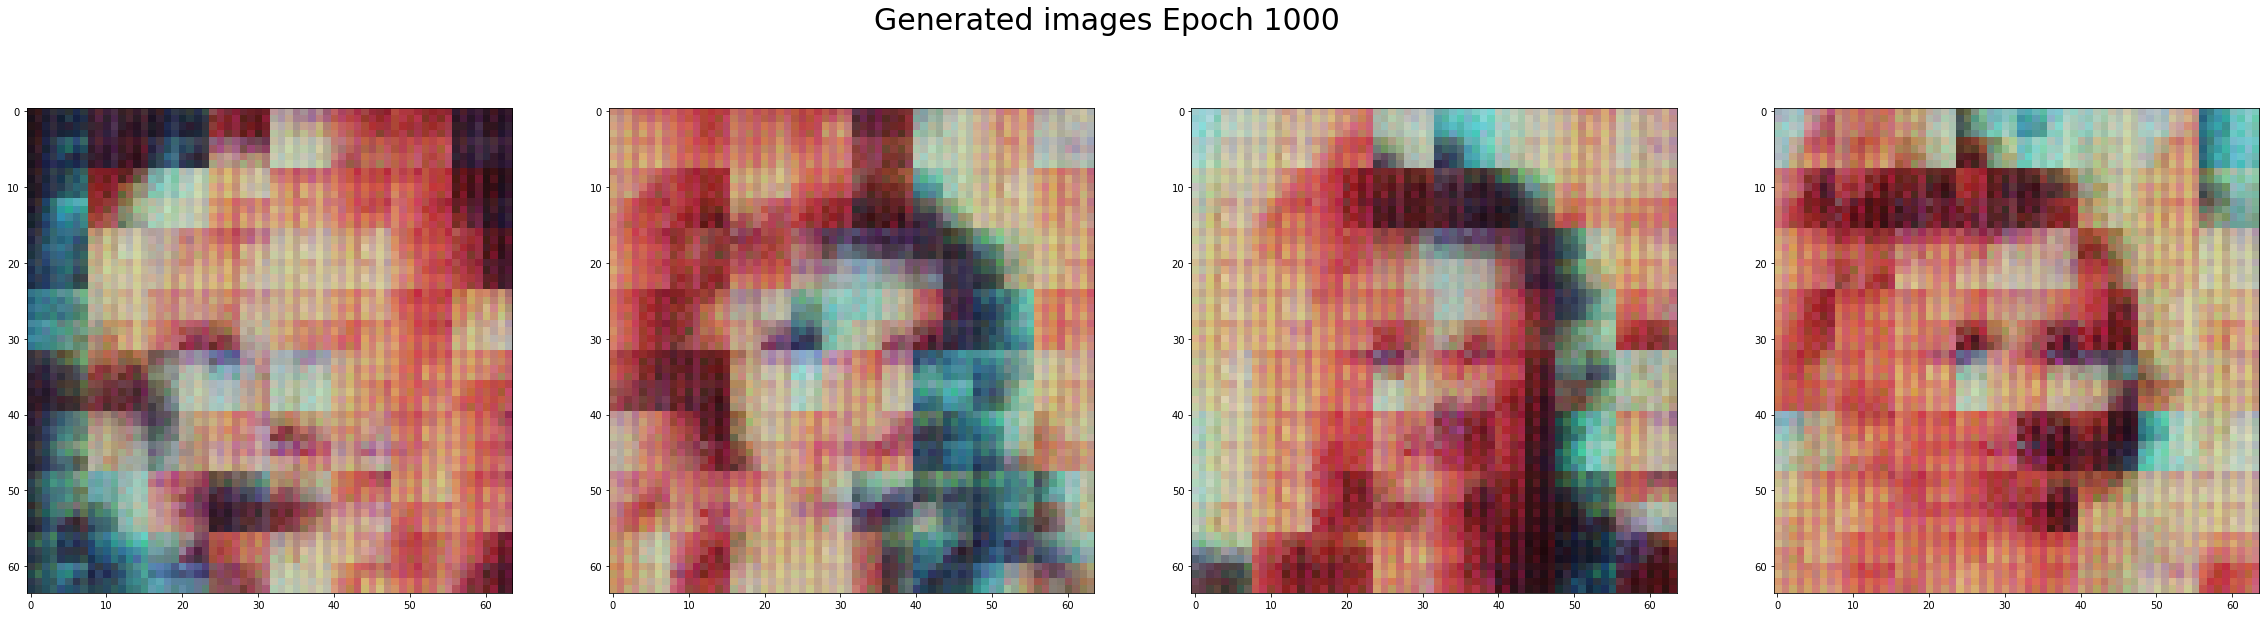

Epoch 01100 [D loss: 0.853, acc.: 047.0%] [G loss: 0.846]
Epoch 01200 [D loss: 0.829, acc.: 049.5%] [G loss: 0.846]
Epoch 01300 [D loss: 0.860, acc.: 046.3%] [G loss: 0.872]
Epoch 01400 [D loss: 0.875, acc.: 046.6%] [G loss: 0.842]
Epoch 01500 [D loss: 0.835, acc.: 049.8%] [G loss: 0.828]
Epoch 01600 [D loss: 0.850, acc.: 047.4%] [G loss: 0.819]
Epoch 01700 [D loss: 0.824, acc.: 049.8%] [G loss: 0.818]
Epoch 01800 [D loss: 0.829, acc.: 048.6%] [G loss: 0.822]
Epoch 01900 [D loss: 0.824, acc.: 050.3%] [G loss: 0.846]
Epoch 02000 [D loss: 0.832, acc.: 049.6%] [G loss: 0.840]


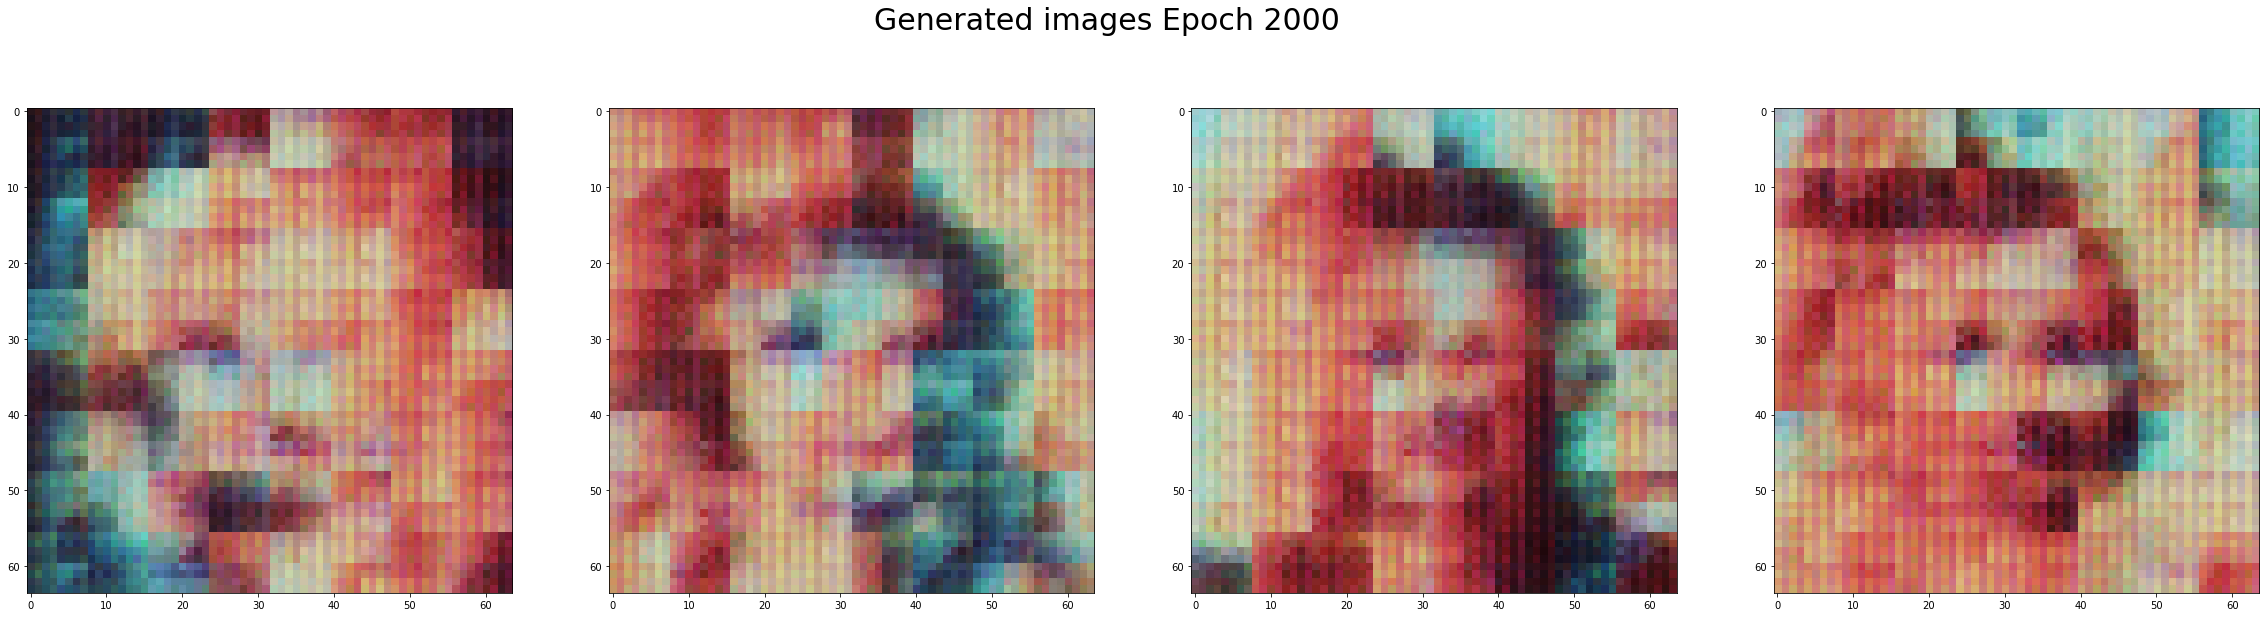

Epoch 02100 [D loss: 0.851, acc.: 048.4%] [G loss: 0.810]
Epoch 02200 [D loss: 0.842, acc.: 046.9%] [G loss: 0.828]
Epoch 02300 [D loss: 0.810, acc.: 052.0%] [G loss: 0.780]
Epoch 02400 [D loss: 0.826, acc.: 046.7%] [G loss: 0.833]
Epoch 02500 [D loss: 0.807, acc.: 050.3%] [G loss: 0.822]


KeyboardInterrupt: ignored

In [ ]:
# While training discriminator, hold generator values constant. When training generator, hold discriminator values constant
def train(models, X_train, noise_plot, dir_result="/result/", epochs=10000, batch_size=128):
        '''
        models     : tuple containins three tensors, (combined, discriminator, generator)
        X_train    : np.array containing images (Nsample, height, width, Nchannels)
        noise_plot : np.array of size (Nrandom_sample_to_plot, hidden unit length)
        dir_result : the location where the generated plots for noise_plot are saved 
        
        '''
        combined, discriminator, generator = models
        nlatent_dim = noise_plot.shape[1]
        half_batch  = int(batch_size / 2)
        history = []
        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]
            noise = get_noise(half_batch, nlatent_dim)

            # Generate a half batch of new images
            gen_imgs = generator.predict(noise)

            
            # Train the discriminator q: better to mix them together?
            d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
            d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            # ---------------------
            #  Train Generator
            # ---------------------

            noise = get_noise(batch_size, nlatent_dim)

            # The generator wants the discriminator to label the generated samples
            # as valid (ones)
            valid_y = (np.array([1] * batch_size)).reshape(batch_size,1)
            
            # Train the generator
            g_loss = combined.train_on_batch(noise, valid_y)

            history.append({"D":d_loss[0],"G":g_loss})
            
            if epoch % 100 == 0:
                # Plot the progress
                print ("Epoch {:05.0f} [D loss: {:4.3f}, acc.: {:05.1f}%] [G loss: {:4.3f}]".format(
                    epoch, d_loss[0], 100*d_loss[1], g_loss))
            if epoch % int(epochs/100) == 0:
                plot_generated_images(noise_plot,
                                      path_save=dir_result+"/image_{:05.0f}.png".format(epoch),
                                      titleadd="Epoch {}".format(epoch))
            if epoch % 1000 == 0:
                plot_generated_images(noise_plot,
                                      titleadd="Epoch {}".format(epoch))
                        
        return(history)

dir_result="./result_GAN_Nadam_selu_HEuniform_6000e_2000f_lr0.0003_refinedModel_64x64/"

try:
    os.mkdir(dir_result)
except:
    pass
    
start_time = time.time()

_models = combined, discriminator, generator          

history = train(_models, X_train, noise, dir_result=dir_result,epochs=3100, batch_size=128*8)
end_time = time.time()
print("-"*10)
print("Time took: {:4.2f} min".format((end_time - start_time)/60))

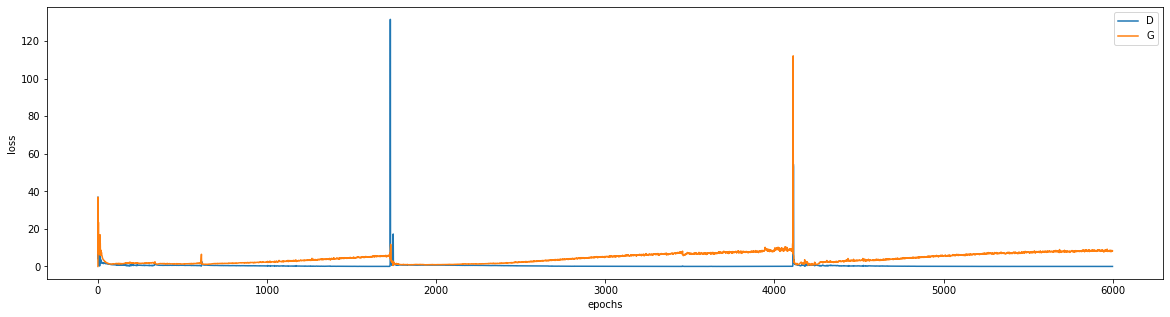

In [ ]:
import pandas as pd 
hist = pd.DataFrame(history)
plt.figure(figsize=(20,5))
for colnm in hist.columns:
    plt.plot(hist[colnm],label=colnm)
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [ ]:
# Convert images into gif
def makegif(dir_images):
    import imageio
    filenames = np.sort(os.listdir(dir_images))
    filenames = [ fnm for fnm in filenames if ".png" in fnm]

    with imageio.get_writer(dir_images + '/image.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(dir_images + filename)
            writer.append_data(image)
            os.remove(dir_images + filename)
            
makegif(dir_result)